## __A Study on Stock Price of TotalEnergies Forecasting with Simple Neural Networks and LSTM__

### Forecasting

* Forecasting is the estimation of the future values of a variable.
* We make forecasting about future events by drawing meaning from the models we obtained by using information from earlier periods.
* Strategies, plans and targets for the future are determined by forecasting. 
* Forecasting studies were initially realized with simple modeling experiments and then more complex models were established by using the advantages of techonology, and better results were obtanied.

<img src="https://otexts.com/fpp2/nnet2.png" style="width: 600px;"/> <br>
_A neural network with four inputs and one hidden layer with three hidden neurons._ <br>

### Import Libraries

In [42]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM
print("All libraries have been imported")

All libraries have been imported


### The Data

Crude Oil WTI CL=F Stock Price
<br> I get the data from "finance.yahoo.com". Dataset can be downloaded from [here](https://ca.finance.yahoo.com/quote/CL%3DF/history?period1=1262304000&period2=1577836800&interval=1d&filter=history&frequency=1d). I set the date range from Jan 01, 2010 to Jan 01, 2020 . 

Load the data into a Pandas dataframe and have a quick peek of the head rows.

In [43]:
df = pd.read_csv('TotalEnergies.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1994-02-28,13.8125,14.0625,13.8125,14.0000,3.785994,480800
1,1994-03-01,13.8750,13.8750,13.6875,13.7500,3.718387,231000
2,1994-03-02,13.2500,13.5000,13.1875,13.5000,3.650780,176800
3,1994-03-03,13.4375,13.4375,13.2500,13.4375,3.633877,98200
4,1994-03-04,13.3750,13.5000,13.3750,13.5000,3.650780,88400
5,1994-03-07,13.5625,13.8125,13.5625,13.7500,3.718387,408400
6,1994-03-08,13.7500,13.7500,13.6875,13.6875,3.701484,138800
7,1994-03-09,13.7500,13.8125,13.6875,13.7500,3.718387,69400
8,1994-03-10,13.9375,14.0000,13.8750,14.0000,3.785994,55200
9,1994-03-11,14.0000,14.1250,14.0000,14.0625,3.802895,55400


In [44]:
df.dropna(inplace=True)
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1994-02-28,13.8125,14.0625,13.8125,14.0000,3.785994,480800
1,1994-03-01,13.8750,13.8750,13.6875,13.7500,3.718387,231000
2,1994-03-02,13.2500,13.5000,13.1875,13.5000,3.650780,176800
3,1994-03-03,13.4375,13.4375,13.2500,13.4375,3.633877,98200
4,1994-03-04,13.3750,13.5000,13.3750,13.5000,3.650780,88400
5,1994-03-07,13.5625,13.8125,13.5625,13.7500,3.718387,408400
6,1994-03-08,13.7500,13.7500,13.6875,13.6875,3.701484,138800
7,1994-03-09,13.7500,13.8125,13.6875,13.7500,3.718387,69400
8,1994-03-10,13.9375,14.0000,13.8750,14.0000,3.785994,55200
9,1994-03-11,14.0000,14.1250,14.0000,14.0625,3.802895,55400


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7551 entries, 0 to 7550
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7551 non-null   object 
 1   Open       7551 non-null   float64
 2   High       7551 non-null   float64
 3   Low        7551 non-null   float64
 4   Close      7551 non-null   float64
 5   Adj Close  7551 non-null   float64
 6   Volume     7551 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 413.1+ KB


<br>
We will drop the columns we don't need then convert "Date" column to datatime data type and set "Date" column to index.

In [46]:
df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7551 entries, 0 to 7550
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    7551 non-null   object 
 1   Close   7551 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.1+ KB


In [48]:
df['Date'] = pd.to_datetime(df['Date'])
df_chg= df.set_index(['Date'], drop=True)
df_chg.head()

,Close
Date,
1994-02-28,14.0000
1994-03-01,13.7500
1994-03-02,13.5000
1994-03-03,13.4375
1994-03-04,13.5000


### The Plotting

We plot a time series line plot

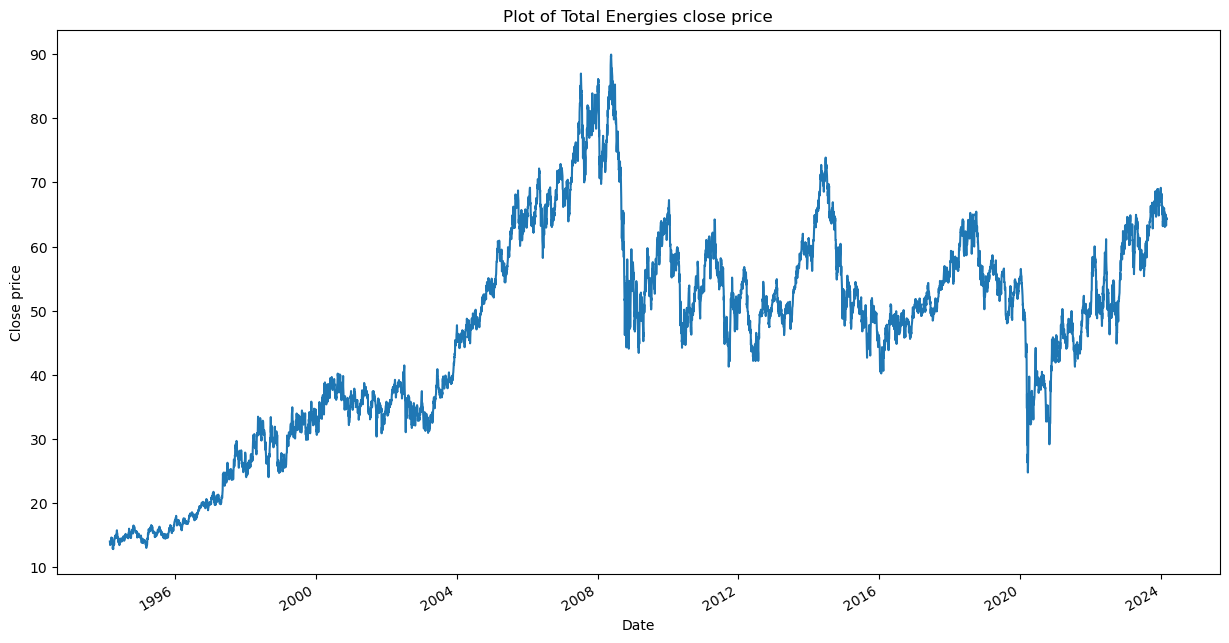

In [76]:
plt.figure(figsize=(15,8))
df_chg['Close'].plot()
plt.ylabel('Close price')
plt.title('Plot of Total Energies close price')
plt.show();

### Split The Data

We split the data by nearly %80 and %20 to train and test. Split the data to train and test set by date "2017-12-27". That is, the data prior to this date is the traning data and the data from this data onward is the test data and we plotting it again.

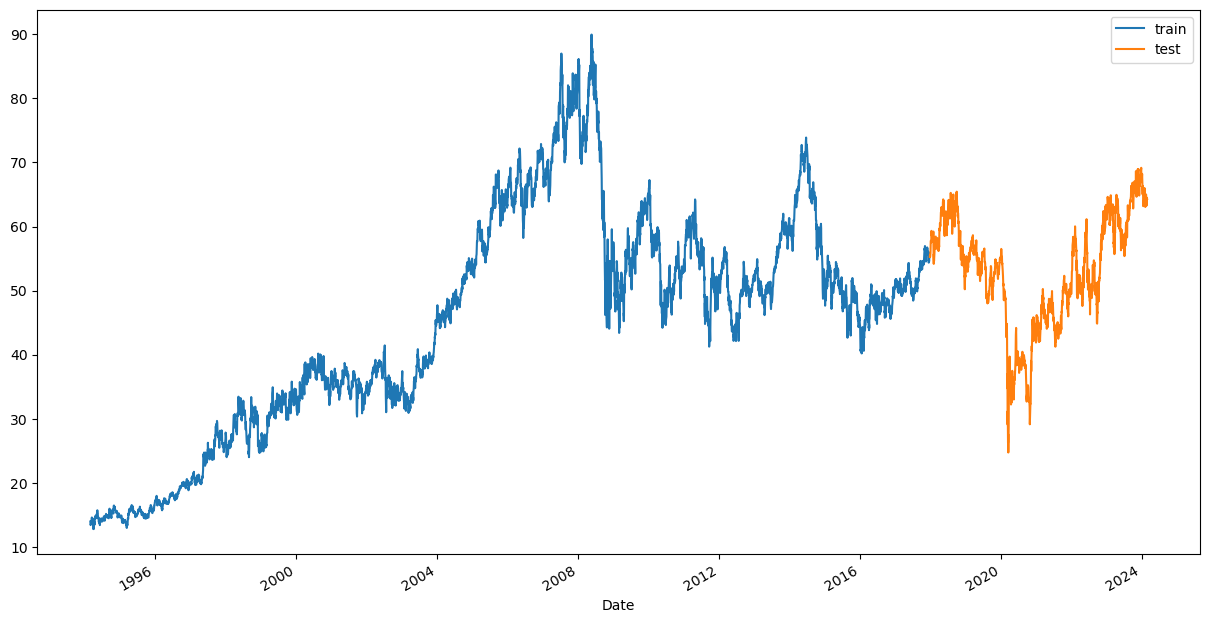

In [50]:
split_date = pd.Timestamp('2017-12-27')
df1 = df_chg['Close']
train = df1.loc[:split_date]
test = df1.loc[split_date:]
plt.figure(figsize=(15,8))
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test']);

### Scale The Data

We scale train and test data to [-1, 1]

We splited train and test with Date values. We have to convert datas.

In [51]:
print("We have", len(train), "train values")
print("We have", len(test), "test values")

We have 6002 train values
We have 1550 test values


<br>
We split train and test again 

In [52]:
# Save the original index before conversion
train_index = df_chg.index[0:1996]
test_index = df_chg.index[1995:2495]

# Convert DataFrame to NumPy array
train_processed = df_chg.iloc[:, 0:1].values
train_processed = train_processed[0:1996:1]
test_processed = df_chg.iloc[:, 0:1].values
test_processed = test_processed[1995:2495:1]

and scale datas

In [53]:
scaler = MinMaxScaler(feature_range=(-1, 1))
train_sc = scaler.fit_transform(train_processed)
test_sc = scaler.transform(test_processed)

Get traning and test data

In [54]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

In [55]:
X_test = test_sc[:-1]
y_test = test_sc[1:]

### Simple ANN - Traning Model

* We create a Sequantial model
* add layers via the .add() method
* Pass an input_dim argument to the first layer.
* The activation function is the Rectified Linear Unit- Relu.
* Configure the learning process, which is done via the compile method.
* A loss function is mean_squared_error , and An optimizer is adam.
* Stop training when a monitored loss has stopped improving.
* patience=2, indicate number of epochs with no improvement after which training will be stopped.
* The ANN is trained for 100 epochs and a batch size of 1 is used.

In [56]:
nn_model = Sequential()
nn_model.add(Dense(12, input_dim=1, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, validation_data= (X_test, y_test), 
                       callbacks=[early_stop], shuffle=False)

Epoch 1/100
1995/1995 [==============================] - 7s 3ms/step - loss: 0.0440 - val_loss: 0.0117
Epoch 2/100
1995/1995 [==============================] - 5s 3ms/step - loss: 0.0033 - val_loss: 0.0099
Epoch 3/100
1995/1995 [==============================] - 5s 3ms/step - loss: 0.0021 - val_loss: 0.0093
Epoch 4/100
1995/1995 [==============================] - 4s 2ms/step - loss: 0.0019 - val_loss: 0.0090
Epoch 5/100
1995/1995 [==============================] - 5s 2ms/step - loss: 0.0019 - val_loss: 0.0089
Epoch 6/100
1995/1995 [==============================] - 5s 2ms/step - loss: 0.0018 - val_loss: 0.0087
Epoch 7/100
1995/1995 [==============================] - 4s 2ms/step - loss: 0.0017 - val_loss: 0.0086
Epoch 8/100
1995/1995 [==============================] - 5s 2ms/step - loss: 0.0016 - val_loss: 0.0085
Epoch 9/100
1995/1995 [==============================] - 5s 3ms/step - loss: 0.0016 - val_loss: 0.0085
Epoch 10/100
1995/1995 [==============================] - 6s 3ms/step - l

<br>
It had an early stopping at Epoch 19/100

We predict our model and get R2 scores for train and test.

In [57]:
y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

63/63 [==============================] - 0s 2ms/step
The R2 score on the Train set is:	0.991
The R2 score on the Test set is:	0.919


In [58]:
nn_test_mse = nn_model.evaluate(X_test, y_test, batch_size=1)
nn_train_mse = nn_model.evaluate(X_train, y_train, batch_size=1)
print('NN: %f'%nn_test_mse)
print('NN: %f'%nn_train_mse)

1995/1995 [==============================] - 5s 3ms/step - loss: 0.0035
NN: 0.004611
NN: 0.003477


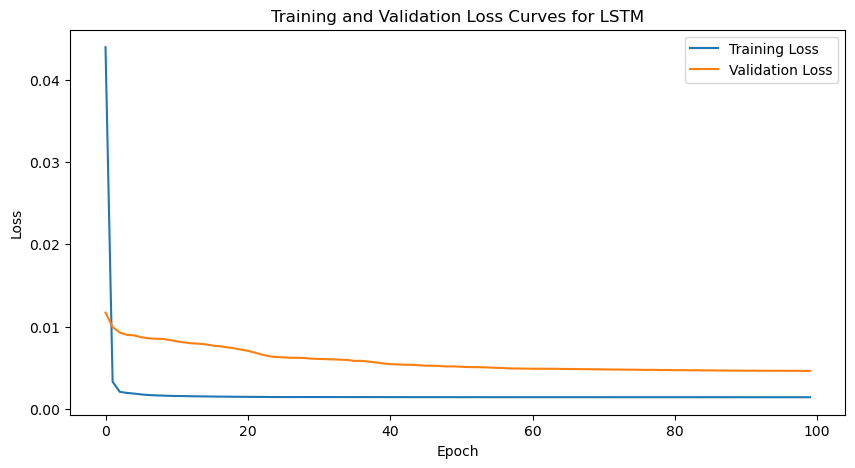

In [71]:
# Plot the training and validation loss curves
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves for LSTM')
plt.legend()




### LSTM - Traning Model

We use shift function that shifts the entire column by 1.

In [60]:
print(train.shape)
print(train_sc.shape)
print(test_sc.shape)
print(df_chg.shape)
print(df.shape)
print(train_processed.shape)
print(test_processed.shape) 
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(6002,)
(1996, 1)
(500, 1)
(7551, 1)
(7551, 2)
(1996, 1)
(500, 1)
(499, 1)
(1995, 1)
(499, 1)
(1995, 1)


In [61]:
print(train_index.shape)

(1996,)


In [62]:
train_sc_df = pd.DataFrame(train_sc, columns=['Y'], index=train_index)
test_sc_df = pd.DataFrame(test_sc, columns=['Y'], index=test_index)


for s in range(1,2):
    train_sc_df['X_{}'.format(s)] = train_sc_df['Y'].shift(s)
    test_sc_df['X_{}'.format(s)] = test_sc_df['Y'].shift(s)

X_train = train_sc_df.dropna().drop('Y', axis=1)
y_train = train_sc_df.dropna().drop('X_1', axis=1)

X_test = test_sc_df.dropna().drop('Y', axis=1)
y_test = test_sc_df.dropna().drop('X_1', axis=1)

X_train = X_train['X_1']
y_train = y_train['Y']
X_test = X_test['X_1']
y_test = y_test['Y']

X_train = X_train.values
y_train = y_train.values

X_test = X_test.values
y_test = y_test.values

We will need to convert all our input variables in a 3D vector form.

In [64]:
X_train_lmse = X_train.reshape(X_train.shape[0], 1, 1)
X_test_lmse = X_test.reshape(X_test.shape[0], 1, 1)

print('Train shape: ', X_train_lmse.shape)
print('Test shape: ', X_test_lmse.shape)

Train shape:  (1995, 1, 1)
Test shape:  (499, 1, 1)


* LSTM has a visible layer with 1 input.
* A hidden layer with LSTM neurons.
* We used relu activation function for the LSTM neurons. 
* A loss function is mean_squared_error , and An optimizer is adam.
* Stop training when a monitored loss has stopped improving.
* The LSTM is trained for 100 epoch and a batch size of 1 is used.

In [65]:
lstm_model = Sequential()
lstm_model.add(LSTM(7, input_shape=(1, X_train_lmse.shape[1]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history_lstm_model = lstm_model.fit(X_train_lmse, y_train, epochs=100, batch_size=1, verbose=1, validation_data=(X_test_lmse, y_test), shuffle=False, callbacks=[early_stop])

Epoch 1/100
1995/1995 [==============================] - 9s 3ms/step - loss: 0.1073 - val_loss: 0.0861
Epoch 2/100
1995/1995 [==============================] - 6s 3ms/step - loss: 0.0235 - val_loss: 0.0690
Epoch 3/100
1995/1995 [==============================] - 9s 5ms/step - loss: 0.0045 - val_loss: 0.0479
Epoch 4/100
1995/1995 [==============================] - 7s 3ms/step - loss: 0.0023 - val_loss: 0.0329
Epoch 5/100
1995/1995 [==============================] - 5s 3ms/step - loss: 0.0016 - val_loss: 0.0238
Epoch 6/100
1995/1995 [==============================] - 7s 4ms/step - loss: 0.0016 - val_loss: 0.0194
Epoch 7/100
1995/1995 [==============================] - 5s 3ms/step - loss: 0.0016 - val_loss: 0.0169
Epoch 8/100
1995/1995 [==============================] - 10s 5ms/step - loss: 0.0016 - val_loss: 0.0154
Epoch 9/100
1995/1995 [==============================] - 11s 6ms/step - loss: 0.0015 - val_loss: 0.0145
Epoch 10/100
1995/1995 [==============================] - 7s 3ms/step -

<br>
It had an early stopping at Epoch 19/100

We predict our LSTM model and get R2 scores for train and test.

In [66]:
y_pred_test_lstm = lstm_model.predict(X_test_lmse)
y_train_pred_lstm = lstm_model.predict(X_train_lmse)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))

63/63 [==============================] - 0s 2ms/step
The R2 score on the Train set is:	0.985
The R2 score on the Test set is:	0.780


Compare test MSE of both models.

In [68]:
lstm_test_mse = lstm_model.evaluate(X_test_lmse, y_test, batch_size=1)
lstm_train_mse = lstm_model.evaluate(X_train_lmse, y_train, batch_size=1)
print('LSTM test mse: %f'%lstm_test_mse)
print('LSTM train mse: %f'%lstm_train_mse)

1995/1995 [==============================] - 5s 3ms/step - loss: 0.0057
LSTM test mse: 0.012601
LSTM train mse: 0.005730


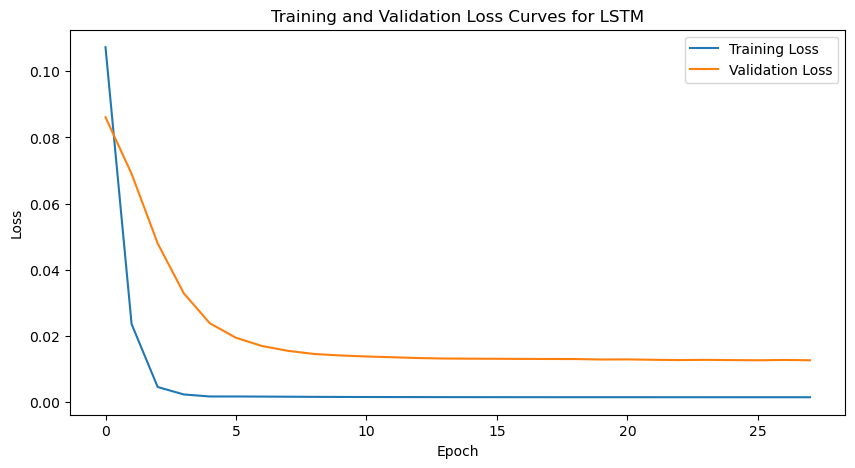

In [70]:
# Plot the training and validation loss curves
plt.figure(figsize=(10, 5))
plt.plot(history_lstm_model.history['loss'], label='Training Loss')
plt.plot(history_lstm_model.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves for LSTM')
plt.legend()




### Forecasting

In [35]:
#y_pred_test_nn
#y_pred_test_lstm


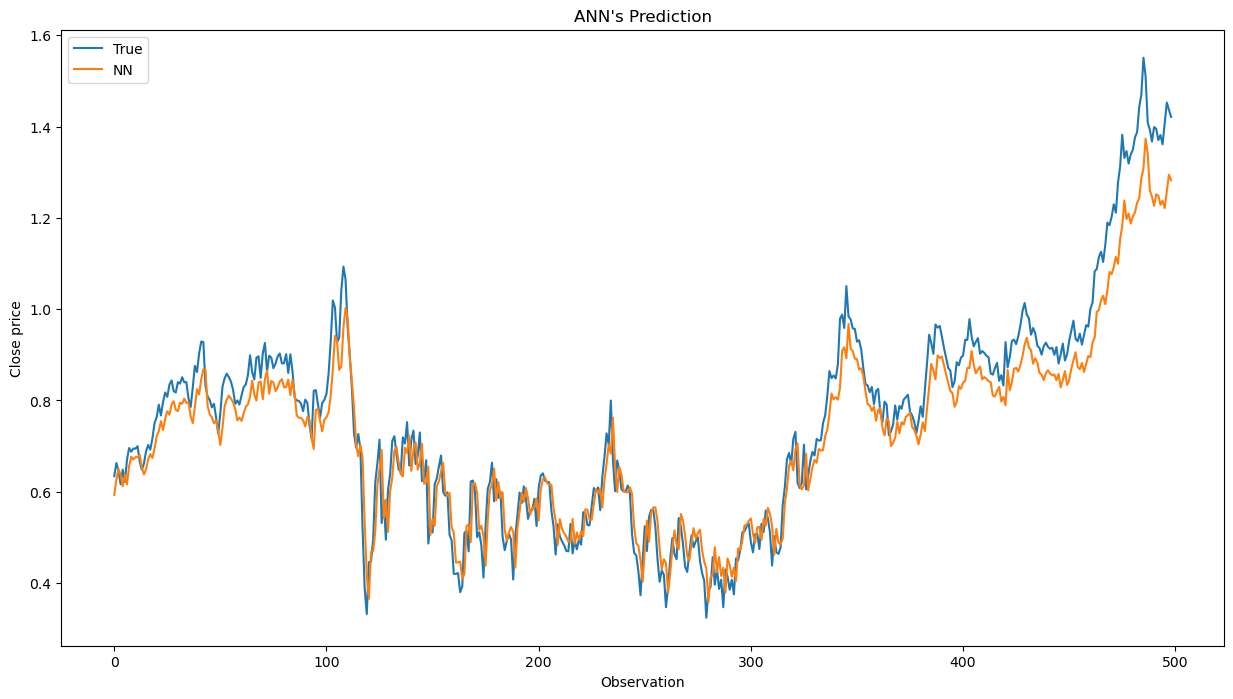

In [75]:
plt.figure(figsize=(15, 8))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_nn, label='NN')
plt.title("ANN's Prediction")
plt.xlabel('Observation')
plt.ylabel('Close price')
plt.legend()
plt.show();

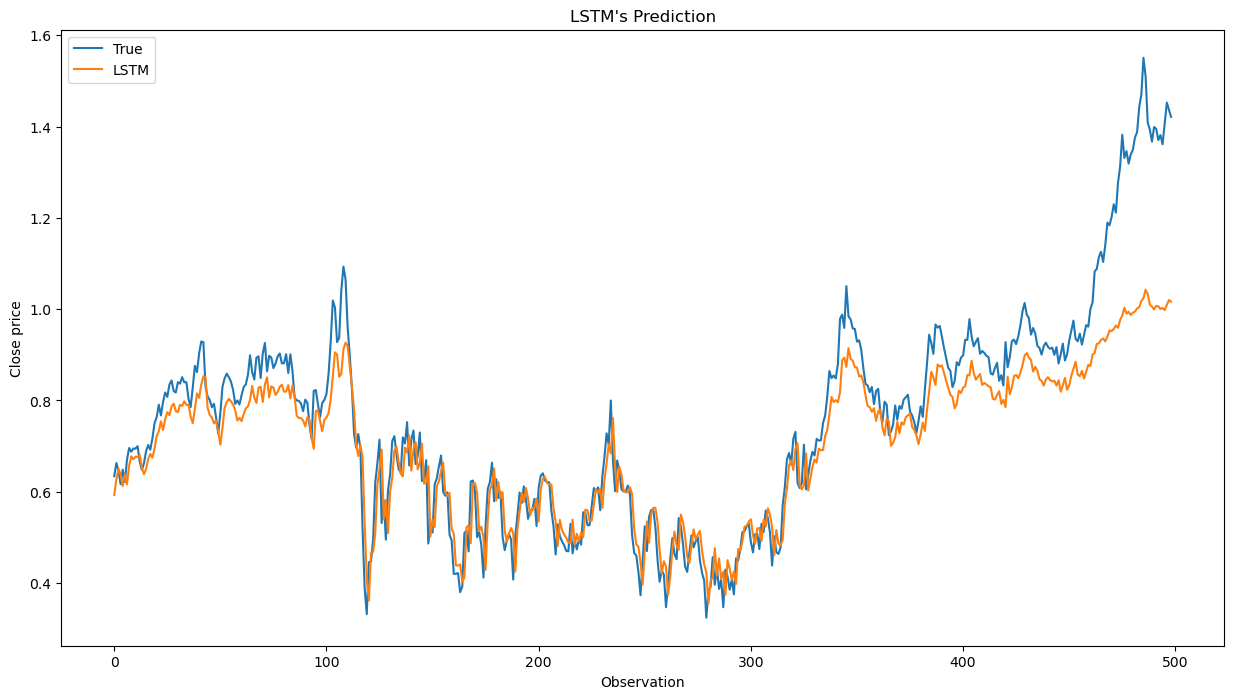

In [74]:
plt.figure(figsize=(15, 8))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's Prediction")
plt.xlabel('Observation')
plt.ylabel('Close price')
plt.legend()
plt.show();